# Tutorial 1 Homework Task (1.5 Marks)

This task is based on Flights data  which comes a part of nycflights13 library. Read about data from the following sources:

https://pypi.org/project/nycflights13/

https://github.com/tidyverse/nycflights13

### <span style="color:red">IMPORTANT:</span> You need to study and understand your data very carefully before answering the questions.

### Data Acquisition

In [1]:
!pip install nycflights13


In [2]:
from nycflights13 import flights
from nycflights13 import weather
from nycflights13 import airports
from nycflights13 import planes
from nycflights13 import airlines
import pandas as pd
#printing first two rows from flights data
#print(flights.head(2))
#getting only required fields/columns from flights in your dataframe

flight_data=flights[['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'hour', 'minute']].copy()
#print('flight data')
print(flight_data.head(2))
flight_data.info()
flight_data.describe()

   year  month  day  dep_time  sched_dep_time  dep_delay  hour  minute
0  2013      1    1     517.0             515        2.0     5      15
1  2013      1    1     533.0             529        4.0     5      29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   hour            336776 non-null  int64  
 7   minute          336776 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 20.6 MB


,year,month,day,dep_time,sched_dep_time,dep_delay,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,23.000000,59.000000


### <span style="color:red">Tutorial Exercise</span>


In this excercise, you need to do following:

a) Using a bar graph, find out which month has the maximum number of actual delayed flights.


b) It can be noticed from the data, there is no schedule departure date column in the data. The date information is distributed in multiple columns such as year, month, day, hour and minute. This limits ability to analyse this data as time series. Write python code to create a column called schedule_dep_date using to_datetime() function. Write also a python code to plot a line graph to see how departure delay time of actual delayed flight varies over time. 
Note: You may read more about to_datetime() function in Pandas from here: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

Before you can plot line graph, you need to remove duplicates for date column. Read about removing duplicates from here.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html





###### <span style="color:red">Submission: </span> Mylo Assignment Box (Tutorial Task)
###### <span style="color:red">Submission Deadline: </span> within 5 Days of your Tutorial

#### Answer to (a)

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

[120139   7162    976    105     16      8     19      4      2      1]
[1.000e+00 1.310e+02 2.610e+02 3.910e+02 5.210e+02 6.510e+02 7.810e+02
 9.110e+02 1.041e+03 1.171e+03 1.301e+03]


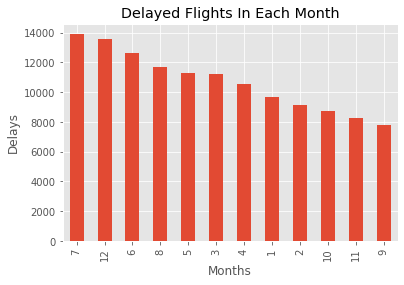

In [4]:
# step 1 - data preparation on dep_delay column
# remove flight with no actual delayed flight from dep_delay column which are:
# - dep_delay NaN indicates that the flight is not departured that day (dep_time is also NaN in this case)
# - dep_delay <=0 indicates that the flight is not delayed
# => the final 'dep_delay > 0' is the value for delayed flight we'll look into
df_delay=flight_data[flight_data['dep_delay']>0].copy()

# step 2 - use a bar chart to show which month has highest delayed flights
count, bin_edges = np.histogram(df_delay['dep_delay'])
print(count)
print(bin_edges)
df_delay['month'].value_counts().plot(kind='bar')
plt.title('Delayed Flights In Each Month')
plt.xlabel('Months')
plt.ylabel('Delays')
plt.show()

#### Answer to (b)

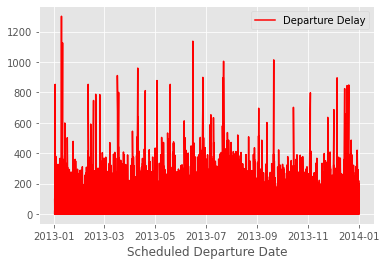

In [5]:
# step 1 - create a schedule_dep_date column which combines year, month, date, hour and minute columns

df_delay['year']=df_delay['year'].astype(str)
df_delay['month']=df_delay['month'].astype(str)
df_delay['day']=df_delay['day'].astype(str)
df_delay['hour']=df_delay['hour'].astype(str)
df_delay['minute']=df_delay['minute'].astype(str)

df_new=df_delay.assign(schedule_dep_date=lambda x: x.year+'-'+x.month+'-'+x.day+' '+x.hour+':'+x.minute)
# parse to datetime
df_new['schedule_dep_date']=pd.to_datetime(df_new['schedule_dep_date'])

# drop duplicate schedule_dep_date values
df_new.drop_duplicates(subset=['schedule_dep_date'])

#step 2 - start plotting
plt.plot(df_new['schedule_dep_date'], df_new['dep_delay'], 'red', label='Departure Delay')
plt.xlabel('Scheduled Departure Date')
plt.legend()
plt.show()
